In [2]:
import numpy as np
import cv2

lena = cv2.imread("images/Lena.bmp", cv2.IMREAD_GRAYSCALE)

filter_a = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])
filter_b = np.array([[1, 3, 1],
                   [3, 9, 3],
                   [1, 3, 1]])
filter_b = filter_b / 25
filter_c = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
filter_d = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

lena_ft = np.fft.fft2(lena)

# part 1.1.1

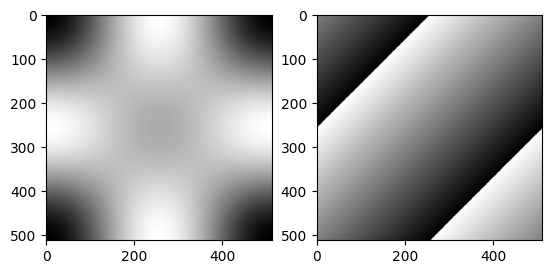

In [5]:
import matplotlib.pyplot as plt


fft_filter_a = np.fft.fft2(filter_a, s=lena.shape)
magnitude_response_a = np.abs(fft_filter_a)
phase_response_a = np.angle(fft_filter_a)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(magnitude_response_a, cmap="gray")
axes[1].imshow(phase_response_a, cmap="gray")
plt.show()

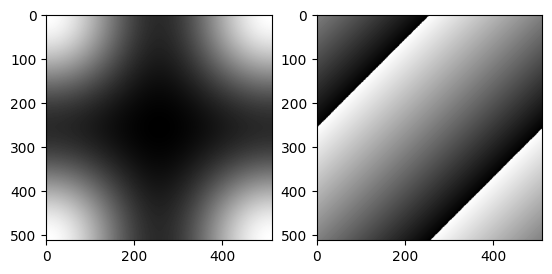

In [4]:
fft_filter_b = np.fft.fft2(filter_b, s=lena.shape)
magnitude_response_b = np.abs(fft_filter_b)
phase_response_b = np.angle(fft_filter_b)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(magnitude_response_b, cmap="gray")
axes[1].imshow(phase_response_b, cmap="gray")
plt.show()

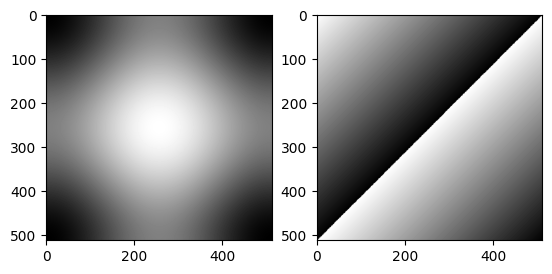

In [5]:
fft_filter_c = np.fft.fft2(filter_c, s=lena.shape)
magnitude_response_c = np.abs(fft_filter_c)
phase_response_c = np.angle(fft_filter_c)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(magnitude_response_c, cmap="gray")
axes[1].imshow(phase_response_c, cmap="gray")
plt.show()

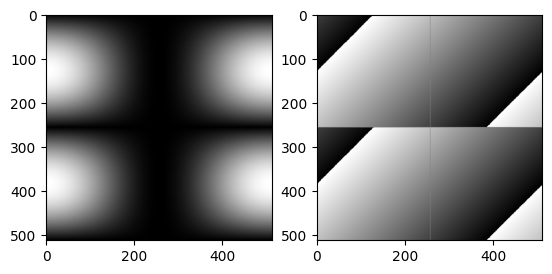

In [6]:
fft_filter_d = np.fft.fft2(filter_d, s=lena.shape)
magnitude_response_d = np.abs(fft_filter_d)
phase_response_d = np.angle(fft_filter_d)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(magnitude_response_d, cmap="gray")
axes[1].imshow(phase_response_d, cmap="gray")
plt.show()

In [14]:
def is_separable(filter):
    # Compute the singular value decomposition (SVD) of the filter
    U, S, Vt = np.linalg.svd(filter)
    # Check if the filter is separable
    is_separable = (S[1] == 0)  # If the second singular value is zero, filter is separable
    return is_separable

print("Filter a is separable:", is_separable(filter_a))
print("Filter b is separable:", is_separable(filter_b))
print("Filter c is separable:", is_separable(filter_c))
print("Filter d is separable:", is_separable(filter_d))

Filter a is separable: False
Filter b is separable: False
Filter c is separable: False
Filter d is separable: True


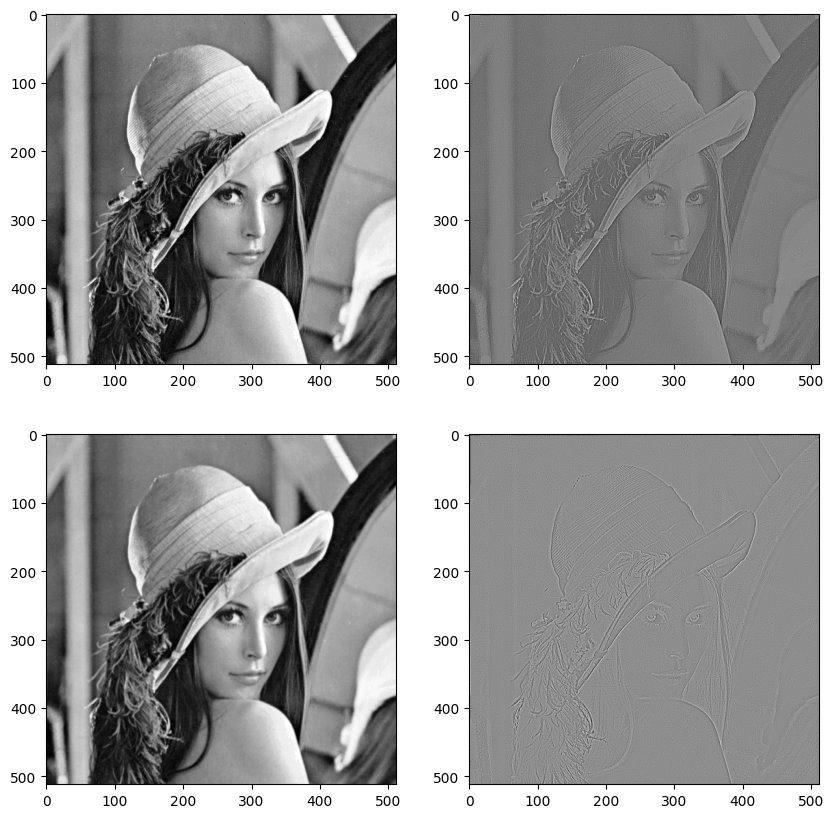

In [24]:
a_ft = fft_filter_a * lena_ft
b_ft  = fft_filter_b * lena_ft
c_ft = fft_filter_c * lena_ft

a_ft = np.real(np.fft.ifft2(a_ft))
b_ft = np.real(np.fft.ifft2(b_ft))
c_ft = np.real(np.fft.ifft2(c_ft))

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(lena, cmap="gray")
axes[0, 1].imshow(a_ft, cmap="gray")
axes[1, 0].imshow(b_ft, cmap="gray")
axes[1, 1].imshow(c_ft, cmap="gray")
plt.show()

# part 1.1.2

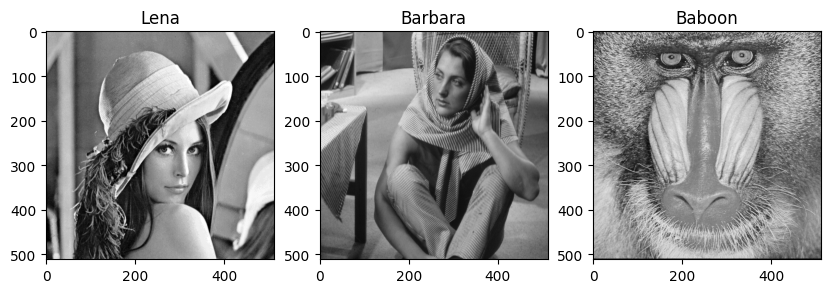

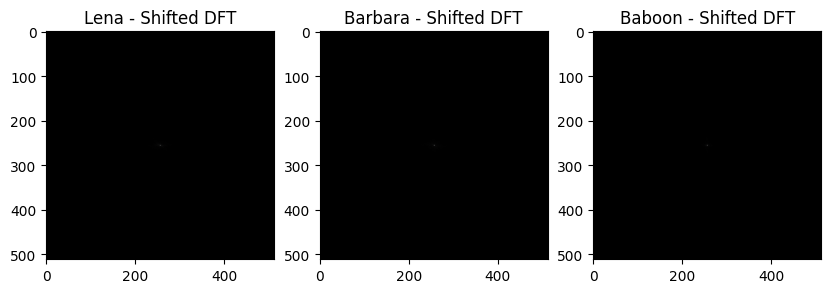

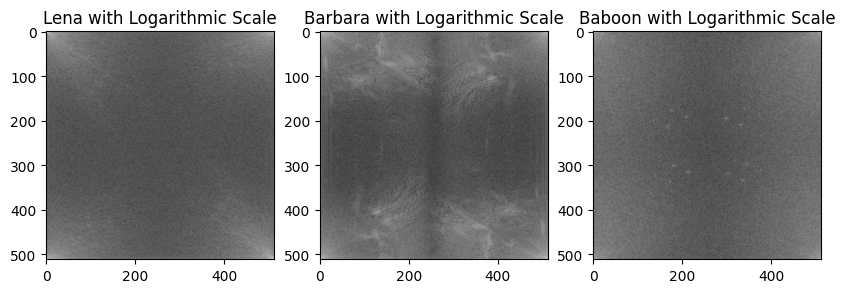

In [6]:
# Read the grayscale images
barbara = cv2.imread("images/Barbara.bmp", cv2.IMREAD_GRAYSCALE)
baboon = cv2.imread("images/Baboon.bmp", cv2.IMREAD_GRAYSCALE)

# Convert images to numpy arrays
lena_array = np.array(lena)
barbara_array = np.array(barbara)
baboon_array = np.array(baboon)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(lena_array, cmap='gray')
axes[0].set_title('Lena')
axes[1].imshow(barbara_array, cmap='gray')
axes[1].set_title('Barbara')
axes[2].imshow(baboon_array, cmap='gray')
axes[2].set_title('Baboon')

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

ft = np.fft.fft2(lena_array)
# Shift the zero-frequency component to the center of the spectrum
shifted_ft = np.fft.fftshift(ft)
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(shifted_ft)
# Display the magnitude spectrum
axes[0].imshow(magnitude_spectrum, cmap='gray')
axes[0].set_title('Lena - Shifted DFT')

ft = np.fft.fft2(barbara_array)
# Shift the zero-frequency component to the center of the spectrum
shifted_ft = np.fft.fftshift(ft)
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(shifted_ft)
# Display the magnitude spectrum
axes[1].imshow(magnitude_spectrum, cmap='gray')
axes[1].set_title('Barbara - Shifted DFT')

ft = np.fft.fft2(baboon_array)
# Shift the zero-frequency component to the center of the spectrum
shifted_ft = np.fft.fftshift(ft)
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(shifted_ft)
# Display the magnitude spectrum
axes[2].imshow(magnitude_spectrum, cmap='gray')
axes[2].set_title('Baboon - Shifted DFT')

# Display the magnitude spectra of Lena, Barbara, and Baboon images without shifting and with logarithmic scaling
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(np.log(1 + np.abs(np.fft.fft2(lena_array))), cmap='gray')
axes[0].set_title('Lena with Logarithmic Scale')

axes[1].imshow(np.log(1 + np.abs(np.fft.fft2(barbara_array))), cmap='gray')
axes[1].set_title('Barbara with Logarithmic Scale')

axes[2].imshow(np.log(1 + np.abs(np.fft.fft2(baboon_array))), cmap='gray')
axes[2].set_title('Baboon with Logarithmic Scale')

plt.show()

# part 1.2.1

#### answer a

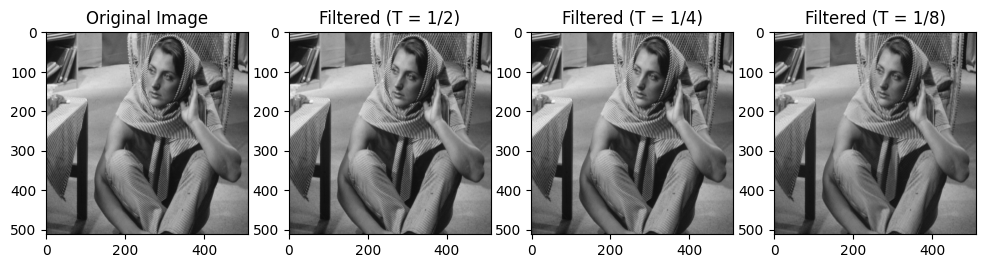

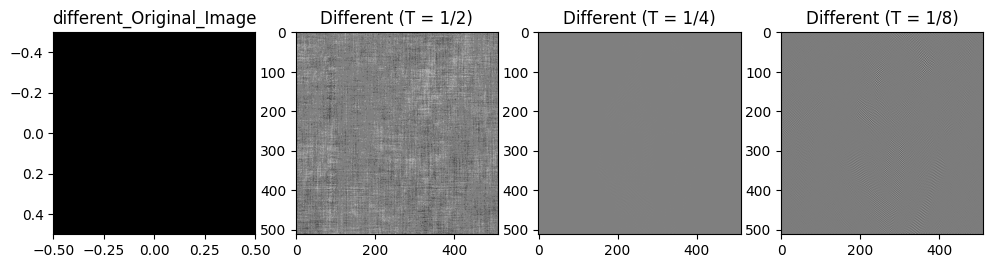

In [73]:
ft = np.fft.fft2(barbara_array)

# Define the threshold values
thresholds = [1/2, 1/4, 1/8]

# Apply the filtering
filtered_fts = []

for threshold in thresholds:
    barbara_array_cp = np.copy(ft)
    for i in range(barbara_array.shape[0]):
        for j in range(barbara_array.shape[1]):
            if threshold * 512 < i and threshold * 512 < j and i < (1 - threshold) * 512 and j < (1 - threshold) * 512:
                barbara_array_cp[i][j] = 0
    filtered_fts.append(barbara_array_cp)



# Perform inverse DFT to obtain the filtered images
filtered_images = [np.fft.ifft2(filtered_ft).real for filtered_ft in filtered_fts]

# Display the original and processed images
fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(barbara_array, cmap='gray')
axs[0].set_title('Original Image')

for i in range(len(thresholds)):
    axs[i+1].imshow(filtered_images[i], cmap='gray')
    axs[i+1].set_title('Filtered (T = 1/{})'.format(2**(i+1)))

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(np.zeros((1, 1)), cmap='gray')
axs[0].set_title('different_Original_Image')
     
for i in range(len(thresholds)):
    axs[i+1].imshow(barbara_array - filtered_images[i], cmap='gray')
    axs[i+1].set_title('Different (T = 1/{})'.format(2**(i+1)))
    
plt.show()

#### answer b) i

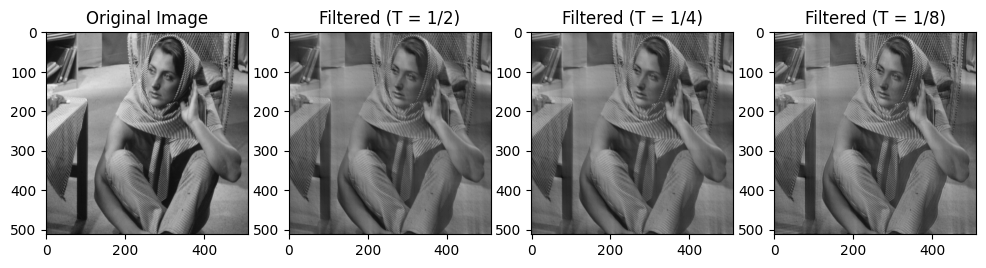

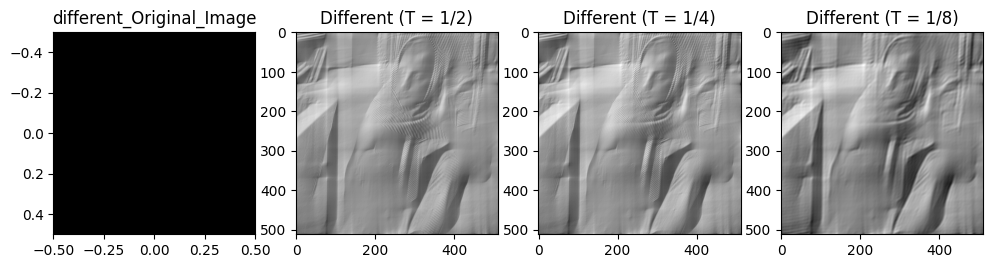

In [76]:
ft = np.fft.fft2(barbara_array)

# Define the threshold values
thresholds = [1/2, 1/4, 1/8]

# Apply the filtering
filtered_fts = []

for threshold in thresholds:
    barbara_array_cp = np.copy(ft)
    for i in range(barbara_array.shape[0]):
        for j in range(barbara_array.shape[1]):
            if threshold * 512 >= i and threshold * 512 >= j:
                barbara_array_cp[i][j] = 0
    filtered_fts.append(barbara_array_cp)



# Perform inverse DFT to obtain the filtered images
filtered_images = [np.fft.ifft2(filtered_ft).real for filtered_ft in filtered_fts]

# Display the original and processed images
fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(barbara_array, cmap='gray')
axs[0].set_title('Original Image')

for i in range(len(thresholds)):
    axs[i+1].imshow(filtered_images[i], cmap='gray')
    axs[i+1].set_title('Filtered (T = 1/{})'.format(2**(i+1)))

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(np.zeros((1, 1)), cmap='gray')
axs[0].set_title('different_Original_Image')
     
for i in range(len(thresholds)):
    axs[i+1].imshow(barbara_array - filtered_images[i], cmap='gray')
    axs[i+1].set_title('Different (T = 1/{})'.format(2**(i+1)))
    
plt.show()

#### answer b) ii

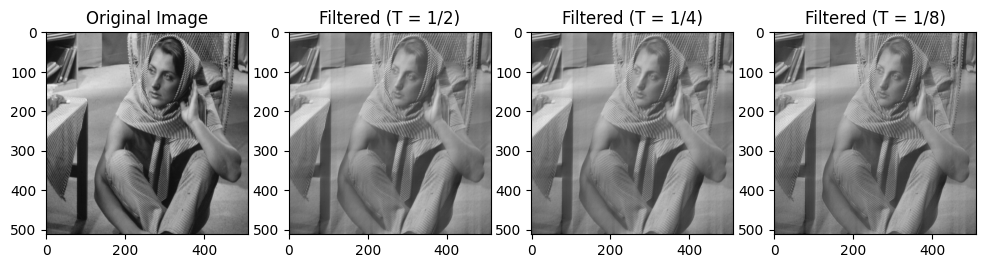

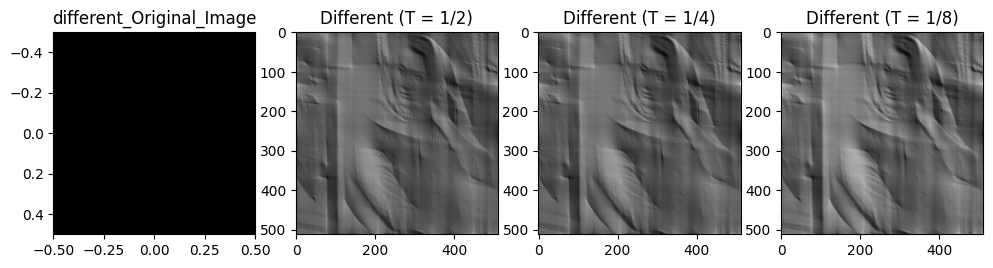

In [78]:
ft = np.fft.fft2(barbara_array)

# Define the threshold values
thresholds = [1/2, 1/4, 1/8]

# Apply the filtering
filtered_fts = []

for threshold in thresholds:
    barbara_array_cp = np.copy(ft)
    for i in range(barbara_array.shape[0]):
        for j in range(barbara_array.shape[1]):
            if threshold * 512 >= i and (1 - threshold) * 512 <= j <= 511:
                barbara_array_cp[i][j] = 0
    filtered_fts.append(barbara_array_cp)



# Perform inverse DFT to obtain the filtered images
filtered_images = [np.fft.ifft2(filtered_ft).real for filtered_ft in filtered_fts]

# Display the original and processed images
fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(barbara_array, cmap='gray')
axs[0].set_title('Original Image')

for i in range(len(thresholds)):
    axs[i+1].imshow(filtered_images[i], cmap='gray')
    axs[i+1].set_title('Filtered (T = 1/{})'.format(2**(i+1)))

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(np.zeros((1, 1)), cmap='gray')
axs[0].set_title('different_Original_Image')
     
for i in range(len(thresholds)):
    axs[i+1].imshow(barbara_array - filtered_images[i], cmap='gray')
    axs[i+1].set_title('Different (T = 1/{})'.format(2**(i+1)))
    
plt.show()

#### answer b) iii

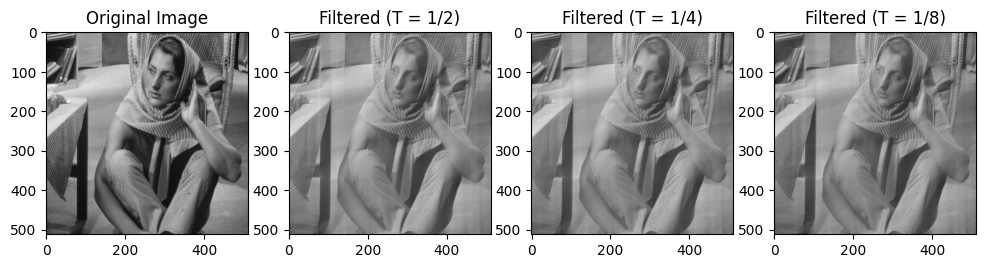

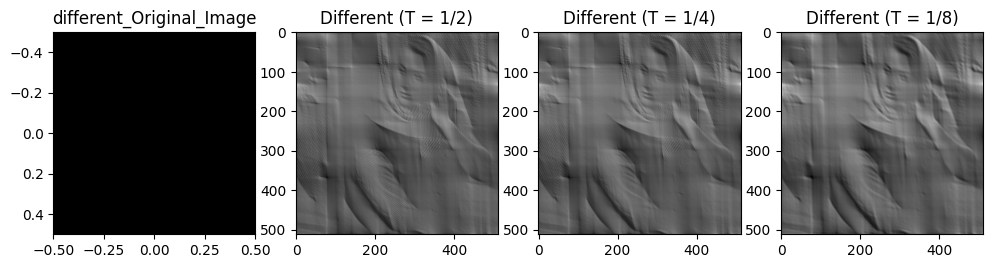

In [79]:
ft = np.fft.fft2(barbara_array)

# Define the threshold values
thresholds = [1/2, 1/4, 1/8]

# Apply the filtering
filtered_fts = []

for threshold in thresholds:
    barbara_array_cp = np.copy(ft)
    for i in range(barbara_array.shape[0]):
        for j in range(barbara_array.shape[1]):
            if threshold * 512 >= j and (1 - threshold) * 512 <= i <= 512:
                barbara_array_cp[i][j] = 0
    filtered_fts.append(barbara_array_cp)



# Perform inverse DFT to obtain the filtered images
filtered_images = [np.fft.ifft2(filtered_ft).real for filtered_ft in filtered_fts]

# Display the original and processed images
fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(barbara_array, cmap='gray')
axs[0].set_title('Original Image')

for i in range(len(thresholds)):
    axs[i+1].imshow(filtered_images[i], cmap='gray')
    axs[i+1].set_title('Filtered (T = 1/{})'.format(2**(i+1)))

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(np.zeros((1, 1)), cmap='gray')
axs[0].set_title('different_Original_Image')
     
for i in range(len(thresholds)):
    axs[i+1].imshow(barbara_array - filtered_images[i], cmap='gray')
    axs[i+1].set_title('Different (T = 1/{})'.format(2**(i+1)))
    
plt.show()

#### answer b) iv

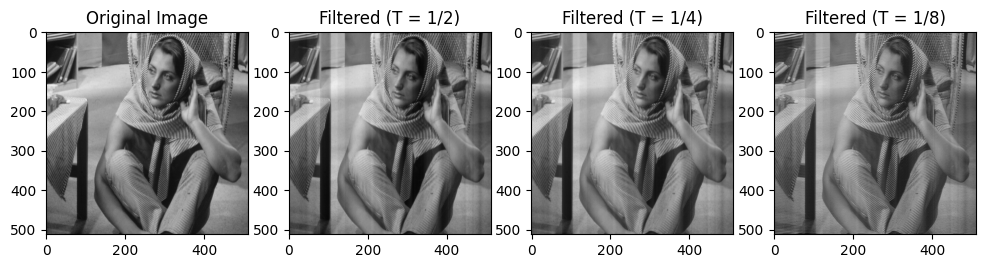

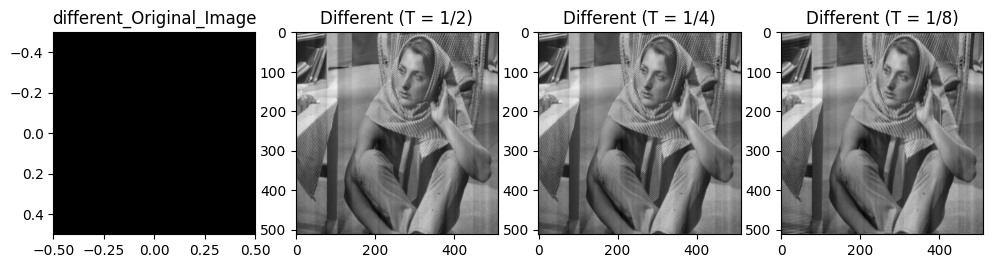

In [80]:
ft = np.fft.fft2(barbara_array)

# Define the threshold values
thresholds = [1/2, 1/4, 1/8]

# Apply the filtering
filtered_fts = []

for threshold in thresholds:
    barbara_array_cp = np.copy(ft)
    for i in range(barbara_array.shape[0]):
        for j in range(barbara_array.shape[1]):
            if 511 >= j and (1 - threshold) * 512 <= i and j <= 511:
                barbara_array_cp[i][j] = 0
    filtered_fts.append(barbara_array_cp)



# Perform inverse DFT to obtain the filtered images
filtered_images = [np.fft.ifft2(filtered_ft).real for filtered_ft in filtered_fts]

# Display the original and processed images
fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(barbara_array, cmap='gray')
axs[0].set_title('Original Image')

for i in range(len(thresholds)):
    axs[i+1].imshow(filtered_images[i], cmap='gray')
    axs[i+1].set_title('Filtered (T = 1/{})'.format(2**(i+1)))

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(12, 4))
axs[0].imshow(np.zeros((1, 1)), cmap='gray')
axs[0].set_title('different_Original_Image')
     
for i in range(len(thresholds)):
    axs[i+1].imshow(barbara_array - filtered_images[i], cmap='gray')
    axs[i+1].set_title('Different (T = 1/{})'.format(2**(i+1)))
    
plt.show()

# part 2.1.1

In [17]:
# Build the Gaussian pyramid
gaussian_pyramid = [barbara]
for i in range(5):
    blurred = cv2.pyrDown(gaussian_pyramid[i])
    gaussian_pyramid.append(blurred)


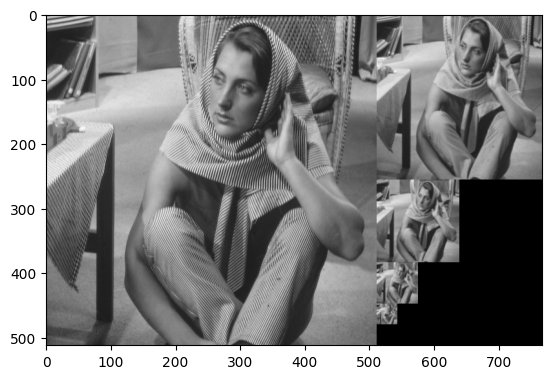

In [19]:
rows, cols = barbara.shape

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in gaussian_pyramid[1:]))
composite_cols = cols + gaussian_pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols] = gaussian_pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in gaussian_pyramid[1:-1]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image, cmap='gray')
plt.show()

In [20]:
# Build the Laplacian pyramid
laplacian_pyramid = []
for i in range(1, 5):
    laplacian = gaussian_pyramid[i-1] - cv2.resize(gaussian_pyramid[i], (gaussian_pyramid[i-1].shape[0], gaussian_pyramid[i-1].shape[1]))
    laplacian_pyramid.append(laplacian)

# Append the last level (smallest image)
laplacian_pyramid.append(gaussian_pyramid[4])


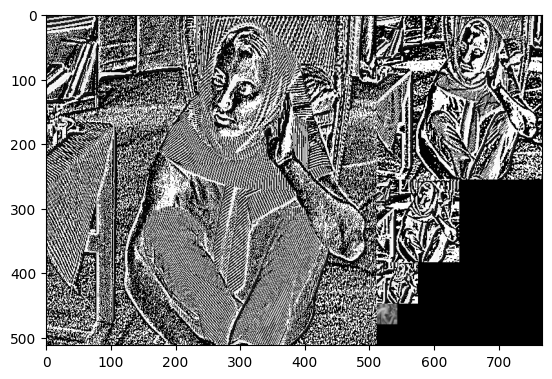

In [23]:
rows, cols = barbara.shape

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in laplacian_pyramid[1:]))
composite_cols = cols + laplacian_pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols] = laplacian_pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in laplacian_pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image, cmap='gray')
plt.show()

# part 2.1.2

In [34]:
from scipy.signal import convolve2d

def averaging(image):
    kernel = np.ones((3, 3), dtype=np.float32) / 9
    filtered_image = convolve2d(image, kernel, mode='same')
    filtered_image = np.uint8(filtered_image)
    return filtered_image

averaged1 = np.copy(lena)
averaged2 = cv2.resize(averaging(averaged1), (int(averaged1.shape[0] / 2), int(averaged1.shape[1] / 2)))
averaged3 = cv2.resize(averaging(averaged2), (int(averaged2.shape[0] / 2), int(averaged2.shape[1] / 2)))
pyramid = [averaged1, averaged2, averaged3]

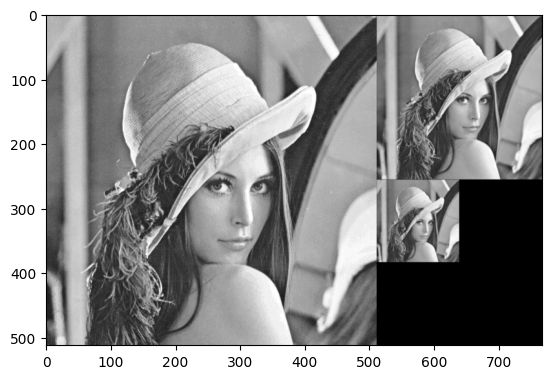

In [35]:
rows, cols = lena.shape

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image, cmap='gray')
plt.show()

In [36]:
residual1 = averaged1 - averaging(averaged1)
residual2 = averaged2 - averaging(averaged2)
residual3 = averaged3
pyramid = [residual1, residual2, residual3]

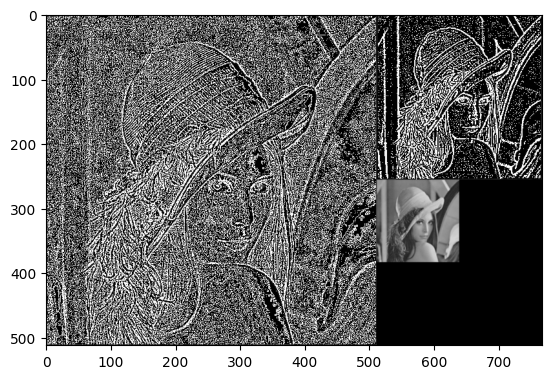

In [37]:
rows, cols = lena.shape

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image, cmap='gray')
plt.show()

# part 2.1.3

In [105]:
import pywt

coeffs = pywt.wavedec2(lena, 'haar', level=5)

# part 2.1.4

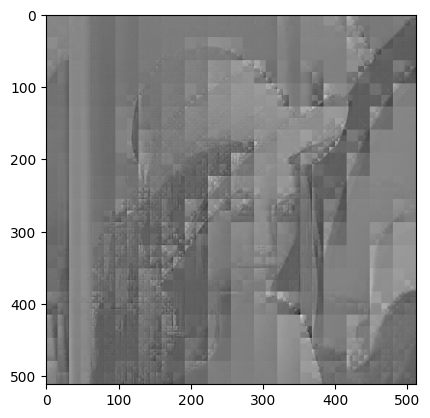

In [109]:
reconstructed = [coeffs[0]]
for i in range(1, 6):
    to_append = []
    for j in range(3):
         to_append.append(2 * np.sign(coeffs[i][j]) * np.floor((coeffs[i][j] / 2)))
    reconstructed.append(to_append)

img = pywt.waverec2(reconstructed, 'haar')
plt.imshow(img, cmap='gray')
plt.show()